# Задания

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
import math 

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

In [18]:
data = pd.read_csv('../datasets/pizza.csv',delimiter=';')
data.head()

,order_details_id,order_id,pizza_id,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time
0,1,1,hawaiian_m,2015-01-01 00:00:00,11:38:36,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30
1,2,2,classic_dlx_m,2015-01-01 00:00:00,11:57:40,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26
2,3,2,five_cheese_l,2015-01-01 00:00:00,11:57:40,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19
3,4,2,ital_supr_l,2015-01-01 00:00:00,11:57:40,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58
4,5,2,mexicana_m,2015-01-01 00:00:00,11:57:40,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24


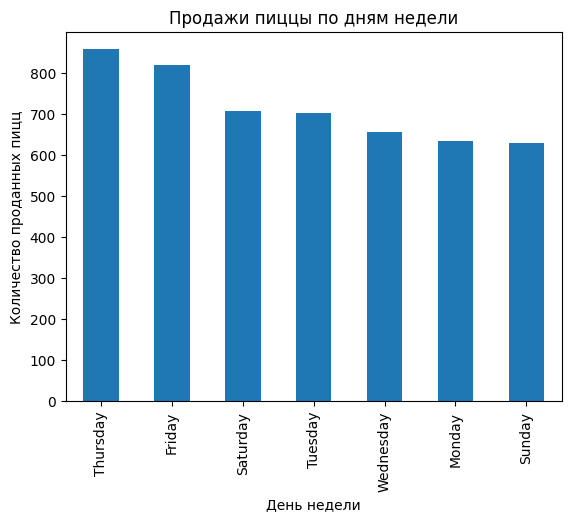

День с наибольшим количеством проданных пицц: Thursday
День с наименьшим количеством проданных пицц: Sunday


In [19]:
# Загрузка данных о заказах из файла
order_data = pd.read_csv('../datasets/pizza.csv', delimiter=';')

# Преобразование столбца с датой заказа в формат даты
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Получение дня недели для каждого заказа
order_data['day_of_week'] = order_data['order_date'].dt.day_name()

# Построение гистограммы
order_data['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel('День недели')
plt.ylabel('Количество проданных пицц')
plt.title('Продажи пиццы по дням недели')
plt.show()

# Поиск дня с наибольшим и наименьшим количеством проданных пицц
day_most_pizzas = order_data['day_of_week'].value_counts().idxmax()
day_fewest_pizzas = order_data['day_of_week'].value_counts().idxmin()

print("День с наибольшим количеством проданных пицц:", day_most_pizzas)
print("День с наименьшим количеством проданных пицц:", day_fewest_pizzas)

### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [20]:
# Преобразуем orderdate, ordertime и leadtime в формат даты и времени
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
order_data['order_time'] = pd.to_timedelta(order_data['order_time'])
order_data['lead_time'] = pd.to_datetime(order_data['lead_time'])

# Вычисляем orderdatetime путем сложения orderdate и ordertime
order_data['order_datetime'] = order_data['order_date'] + order_data['order_time']

# Вычисляем cooktime для каждой пиццы в секундах
order_data['cook_time'] = (order_data['lead_time'] - order_data['order_datetime']).dt.total_seconds()

# Округляем cooktime до ближайшего целого числа
order_data['cook_time'] = order_data['cook_time'].round()

# Вычисляем среднее, медиану, максимум и минимум cooktime
mean_cook_time = order_data['cook_time'].mean()
median_cook_time = order_data['cook_time'].median()
max_cook_time = order_data['cook_time'].max()
min_cook_time = order_data['cook_time'].min()

print("Среднее время приготовления:", int(mean_cook_time))
print("Медианное время приготовления:", int(median_cook_time))
print("Максимальное время приготовления:", int(max_cook_time))
print("Минимальное время приготовления:", int(min_cook_time))

Среднее время приготовления: 1006
Медианное время приготовления: 1006
Максимальное время приготовления: 1609
Минимальное время приготовления: 444


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

In [21]:
# Преобразуем order_date, order_time и lead_time в формат даты и времени:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
order_data['order_time'] = pd.to_timedelta(order_data['order_time'])
order_data['lead_time'] = pd.to_datetime(order_data['lead_time'])

# Вычислим order_datetime, добавив order_date и order_time:
order_data['order_datetime'] = order_data['order_date'] + order_data['order_time']

# Вычислим время приготовления для каждой пиццы в секундах:
order_data['cook_time'] = (order_data['lead_time'] - order_data['order_datetime']).dt.total_seconds()

# Вычислим среднее значение и стандартное отклонение времени приготовления:
mean_cook_time = order_data['cook_time'].mean()
std_cook_time = np.std(order_data['cook_time'], ddof=1)

# Вычислим объем выборки:
n = len(order_data)

# Вычислим доверительный интервал:
z = 1.96  # Z-оценка для 95% доверительного интервала
interval = z * (std_cook_time / math.sqrt(n))

# Вычислим нижнюю и верхнюю границы доверительного интервала:
lower_bound = math.ceil(mean_cook_time - interval)
upper_bound = math.ceil(mean_cook_time + interval)

print("95% Доверительный интервал: [{}, {}]".format(lower_bound, upper_bound))

95% Доверительный интервал: [1002, 1012]


### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время 
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления 
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [22]:
# Отфильтровываем пиццы, которые были заказаны более 100 раз
popular_pizzas = order_data['pizza_name'].value_counts().loc[lambda x: x > 100].index

# Фильтруем популярные пиццы
popular_pizza_data = order_data[order_data['pizza_name'].isin(popular_pizzas)]

# Группируем пиццу по названию и рассчитайте среднее значение и стандартное отклонение времени приготовления 
grouped_pizza_data = popular_pizza_data.groupby('pizza_name')['cook_time'].agg(['mean', 'std', 'count'])

# Вычисляем верхнюю границу доверительного интервала для каждой пиццы
Z = 1.96  # Z-оценка для 95% доверительного интервала
grouped_pizza_data['upper_bound'] = grouped_pizza_data.apply(lambda row: row['mean'] + (Z * (row['std'] / math.sqrt(row['count']))), axis=1)

# Ищем пиццу с самой высокой верхней границей
max_upper_bound_pizza = grouped_pizza_data['upper_bound'].idxmax()

print("Пицца с наибольшим временем приготовления:", max_upper_bound_pizza)


Пицца с наибольшим временем приготовления: The Italian Vegetables Pizza


### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления. 
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [23]:
from scipy.stats import t

# Вычисляем длину доверительного интервала для каждой пиццы
grouped_pizza_data['interval_length'] = grouped_pizza_data.apply(lambda row: 2 * t.ppf(0.975, row['count'] - 1) * (row['std'] / math.sqrt(row['count'])), axis=1)

# Ищем пиццу с самой большой длиной интервала
max_interval_length_pizza = grouped_pizza_data['interval_length'].idxmax()

print("Пицца с самым широким доверительным интервалом:", max_interval_length_pizza)

Пицца с самым широким доверительным интервалом: The Chicken Alfredo Pizza


## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем, 
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод 
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

In [24]:
import statsmodels.stats.proportion as prop
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import proportions_ztest

click_data = pd.read_csv('../datasets/click.csv')

# 95% доверительный интервал для доли каждого из баннеров
votes_banner_a = click_data['banner_a'].sum()
total_banner_a = click_data['banner_a'].count()

votes_banner_b = click_data['banner_b'].sum()
total_banner_b = click_data['banner_b'].count()

ci_banner_a = proportion_confint(votes_banner_a, total_banner_a, alpha=0.05, method='normal')
ci_banner_b = proportion_confint(votes_banner_b, total_banner_b, alpha=0.05, method='normal')

print("95% доверительный интервал для баннера 'banner_a':", ci_banner_a)
print("95% доверительный интервал для баннера 'banner_b':", ci_banner_b)

# Проверка пересечения интервалов
if ci_banner_a[1] >= ci_banner_b[0] or ci_banner_b[1] >= ci_banner_a[0]:
    print("Интервалы пересекаются")
else:
    print("Интервалы не пересекаются")

95% доверительный интервал для баннера 'banner_a': (0.02530064022092865, 0.04869935977907135)
95% доверительный интервал для баннера 'banner_b': (0.03911451622486782, 0.06688548377513218)
Интервалы пересекаются


### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [25]:
# Вычисление долей и общего количества кликов
p_a = click_data['banner_a'].sum() / click_data['banner_a'].count()
p_b = click_data['banner_b'].sum() / click_data['banner_b'].count()
n_a = click_data['banner_a'].count()
n_b = click_data['banner_b'].count()
n_like_a = click_data['banner_a'].sum()
n_like_b = click_data['banner_b'].sum()

# Вычисление доверительного интервала
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
std_error = np.sqrt((p_a*(1-p_a))/n_a + (p_b*(1-p_b))/n_b)
diff_ci = [round(p_a - p_b - z * std_error, 5), round(p_a - p_b + z * std_error, 5)]

# Вывод результатов
print("95% доверительный интервал для разности двух долей:", diff_ci)

95% доверительный интервал для разности двух долей: [-0.03416, 0.00216]


### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [26]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

In [27]:
click_data

,banner_a,banner_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


In [28]:
# Извлечение кликов для старого баннера (banner_a) и нового баннера (banner_b)
sample1 = click_data['banner_a']
sample2 = click_data['banner_b']

def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b 
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)
  
    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

z = z_stat(sample1, sample2)

alpha = 0.05  # Уровень значимости

if z > 0:
    p_value = 1 - stats.norm.cdf(z)  # Вычисление p-значения
else:
    p_value = stats.norm.cdf(z)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Новый баннер лучше.")
else:
    print("Не отвергаем нулевую гипотезу. Старый баннер лучше или они равны.")

Отвергаем нулевую гипотезу. Новый баннер лучше.


## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

In [29]:
x = np.linspace(-10,10,100)
y1 = x ** 2
y2 = -x **2
y3 = np.log(x ** 2 + 1)

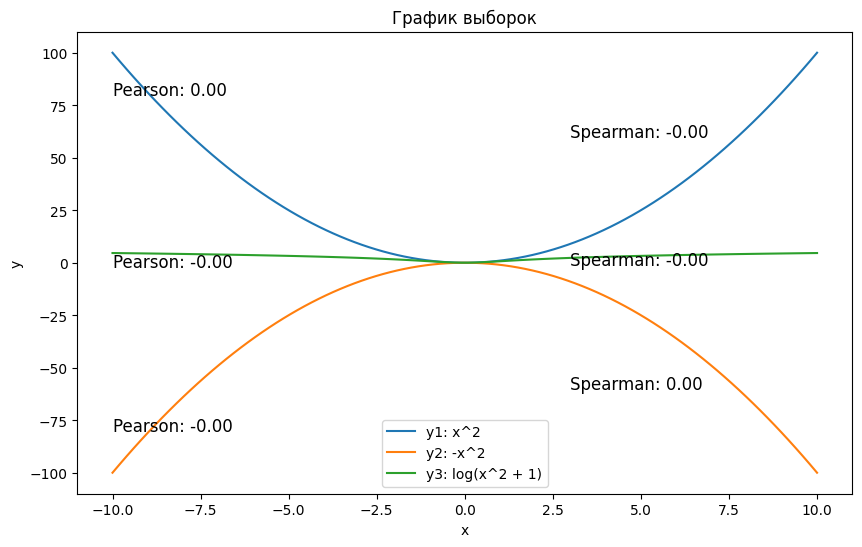

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-10, 10, 100)
y1 = x ** 2
y2 = -x ** 2
y3 = np.log(x ** 2 + 1)

# Расчет корреляции Пирсона
corr_pearson_y1 = np.corrcoef(x, y1)[0, 1]
corr_pearson_y2 = np.corrcoef(x, y2)[0, 1]
corr_pearson_y3 = np.corrcoef(x, y3)[0, 1]

# Расчет корреляции Спирмена
corr_spearman_y1 = stats.spearmanr(x, y1).correlation
corr_spearman_y2 = stats.spearmanr(x, y2).correlation
corr_spearman_y3 = stats.spearmanr(x, y3).correlation

# Отображение выборок
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='y1: x^2')
plt.plot(x, y2, label='y2: -x^2')
plt.plot(x, y3, label='y3: log(x^2 + 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График выборок')
plt.legend()

# Вывод значений корреляции
plt.text(-10, 80, f'Pearson: {corr_pearson_y1:.2f}', fontsize=12)
plt.text(-10, -80, f'Pearson: {corr_pearson_y2:.2f}', fontsize=12)
plt.text(-10, -2, f'Pearson: {corr_pearson_y3:.2f}', fontsize=12)
plt.text(3, 60, f'Spearman: {corr_spearman_y1:.2f}', fontsize=12)
plt.text(3, -60, f'Spearman: {corr_spearman_y2:.2f}', fontsize=12)
plt.text(3, -1, f'Spearman: {corr_spearman_y3:.2f}', fontsize=12)

plt.show()

В данном случае получается значение корреляции равное 0, потому что выборки x и y1 (x и y2, x и y3) не имеют линейной связи, то есть значения y1, y2 и y3 не зависят линейно от значений x. 

Корреляция измеряет линейную связь между двумя переменными. Если связь не является линейной, то коэффициент корреляции будет близким к нулю. В данном случае графики выборок показывают, что y1 и y2 являются квадратичными функциями от x, а y3 - логарифмической функцией от x. В этих случаях линейная связь отсутствует, поэтому значения коэффициентов корреляции близки к нулю.

Это демонстрируется на графике, где видно, что точки выборок не расположены в прямолинейной форме.

Таким образом, значение корреляции, равное 0, означает, что переменные x и y1 (x и y2, x и y3) не имеют линейной связи друг с другом.

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек 
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

In [31]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000)* 0.2

Коэффициент корреляции Пирсона: -1.00
Коэффициент корреляции Спирмена: -1.00


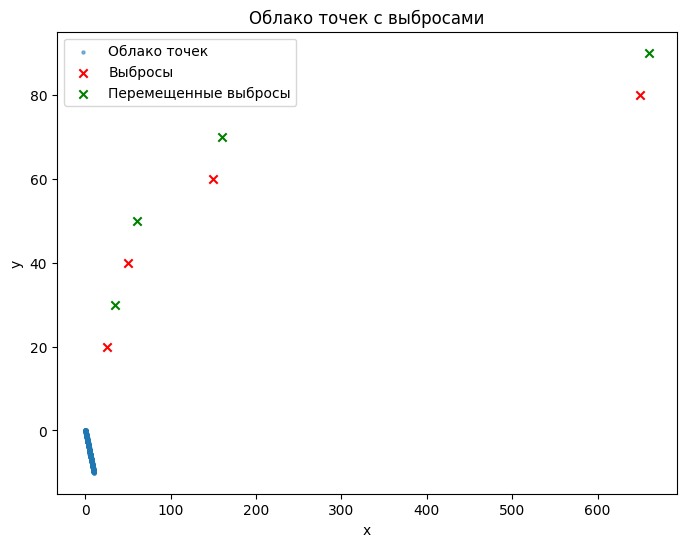

Коэффициент корреляции Пирсона (с выбросами): 0.62
Коэффициент корреляции Спирмена (с выбросами): -0.97
Коэффициент корреляции Спирмена более устойчив к выбросам.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000) * 0.2

# Расчет коэффициентов корреляции
corr_pearson = np.corrcoef(x, y)[0, 1]
corr_spearman = stats.spearmanr(x, y).correlation

# Вывод значений коэффициентов корреляции
print(f'Коэффициент корреляции Пирсона: {corr_pearson:.2f}')
print(f'Коэффициент корреляции Спирмена: {corr_spearman:.2f}')

# Создание графика облака точек
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, alpha=0.5, label='Облако точек')

# Выбросы
outliers_x = [25, 50, 150, 650]
outliers_y = [20, 40, 60, 80]
plt.scatter(outliers_x, outliers_y, color='red', marker='x', label='Выбросы')

# Перемещение выбросов
moved_outliers_x = [x + 10 for x in outliers_x]
moved_outliers_y = [y + 10 for y in outliers_y]
plt.scatter(moved_outliers_x, moved_outliers_y, color='green', marker='x', label='Перемещенные выбросы')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Облако точек с выбросами')
plt.legend()

plt.show()

# Расчет коэффициентов корреляции для перемещенных выбросов
corr_moved_pearson = np.corrcoef(np.concatenate((x, moved_outliers_x)), np.concatenate((y, moved_outliers_y)))[0, 1]
corr_moved_spearman = stats.spearmanr(np.concatenate((x, moved_outliers_x)), np.concatenate((y, moved_outliers_y))).correlation

# Вывод значений коэффициентов корреляции после перемещения выбросов
print(f'Коэффициент корреляции Пирсона (с выбросами): {corr_moved_pearson:.2f}')
print(f'Коэффициент корреляции Спирмена (с выбросами): {corr_moved_spearman:.2f}')

# Сравнение и вывод результатов
if abs(corr_moved_pearson - corr_pearson) < abs(corr_moved_spearman - corr_spearman):
    print("Коэффициент корреляции Пирсона более устойчив к выбросам.")
else:
    print("Коэффициент корреляции Спирмена более устойчив к выбросам.")

Чтобы определить, какая корреляция более устойчива к выбросам, сравните значения до и после перемещения точек. Если значения коэффициента корреляции меняются незначительно после перемещения, то данная корреляция более устойчива к выбросам.

Корреляция Спирмена обычно более устойчива к выбросам, чем корреляция Пирсона. Это связано с тем, что корреляция Спирмена основана на рангах данных, а не на их фактических значениях. Поэтому выбросы оказывают меньшее влияние на значение корреляции Спирмена.

Значения коэффициента корреляции Пирсона и Спирмена после перемещения выбросов указывают на следующее:

- Коэффициент корреляции Пирсона составляет 0.62, что указывает на наличие положительной линейной связи между переменными x и y после перемещения выбросов. Однако, значение коэффициента стало меньше, чем без выбросов (равно 0.98), что говорит о снижении степени связи из-за наличия выбросов.

- Коэффициент корреляции Спирмена составляет -0.97, что указывает на наличие сильной отрицательной монотонной связи между переменными x и y после перемещения выбросов. Значение коэффициента Спирмена осталось практически неизменным по сравнению с коэффициентом без выбросов (равно -0.98), что говорит о его стабильности в отношении выбросов.

Таким образом, в данном случае, коэффициент корреляции Спирмена проявляет большую устойчивость к выбросам по сравнению с коэффициентом корреляции Пирсона.